# Router Positive‑Rate Analysis (2 datasets)
This notebook loads *router_logs_epoch*.jsonl files from two experiment folders, computes per‑CoT positive rates for each student, and plots the results in a 1×2 bar chart row per dataset (final size = 2 × 2 subplots).

In [7]:

import glob, json, re, numpy as np, matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib import rcParams


PAT = re.compile(r"router_logs_epoch(\d+)\.jsonl$")


In [8]:

# ==== configure your two experiment folders here ====
log_dir1 = 'runs'   # <-- path to first dataset logs
log_dir2 = 'runs'    # <-- path to second dataset logs
out_fig  = 'plot/pos_rate_two.pdf'   # figure will also be saved to disk


In [9]:

def _accumulate(rec, counts):
    counts[rec['cot_idx_0']][rec['route_0']] += 1
    counts[rec['cot_idx_1']][rec['route_1']] += 1

def load_counts(log_dir):
    from pathlib import Path
    counts = defaultdict(lambda: [0,0])
    files = sorted(Path(log_dir).glob('router_logs_epoch*.jsonl'),
                   key=lambda p: int(PAT.search(p.name).group(1)))
    if not files:
        raise RuntimeError(f'No router_logs found in {log_dir}')
    for fp in files:
        with open(fp) as f:
            for line in f:
                _accumulate(json.loads(line), counts)
    return counts

def rates_from_counts(counts):
    rates = {}
    for cot, (c0,c1) in counts.items():
        tot = c0 + c1
        if tot:
            rates[cot] = (c0/tot, c1/tot)
    return dict(sorted(rates.items()))


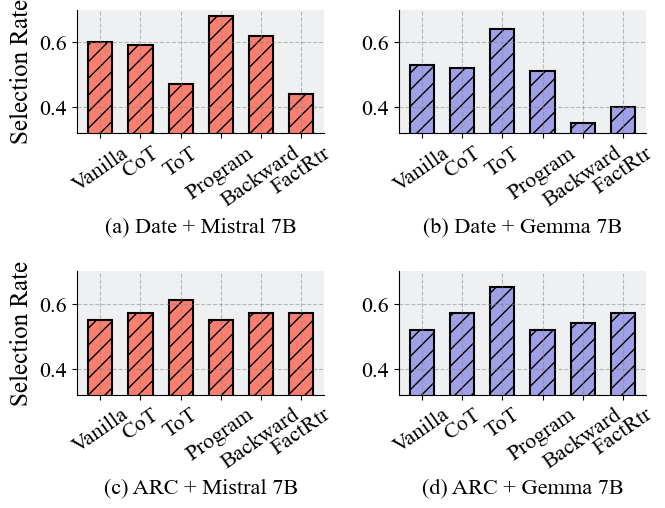

Figure saved to plot/pos_rate_two.pdf


In [39]:

# datasets = [(log_dir1.split('/')[-1], load_counts(log_dir1)),
#             (log_dir2.split('/')[-1], load_counts(log_dir2))]
# datasets = [(name, rates_from_counts(c)) for name,c in datasets]


# ---- style (matches paper) ----
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.facecolor'] = '#EEF0F2'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.alpha'] = 0.5



fig, axs = plt.subplots(2, 2, figsize=(7, 5.5), squeeze=False)
bar_w = 0.6
colors = [(250/255.0, 127/255.0, 111/255.0), (160/255,160/255,230/255)]

s1s = [[0.60, 0.59, 0.47, 0.68, 0.62, 0.44],
        [0.55, 0.57, 0.61, 0.55, 0.57, 0.57]]
s2s = [[0.53, 0.52, 0.64, 0.51, 0.35, 0.40],
        [0.52,0.57,0.65,0.52,0.54,0.57]]

for row in range(2):
    cot_ids = ['Vanilla', 'CoT', 'ToT', 'Program', 'Backward', 'FactRtr']
    s1 = s1s[row]
    s2 = s2s[row]
    x = np.arange(len(cot_ids))

    ax1 = axs[row,0]
    ax1.bar(x, s1, width=bar_w, color=colors[0], edgecolor='black', linewidth=1.5, hatch='//')
    # ax1.set_title(f'{name} – student‑1', fontsize=14)
    ax1.set_ylabel('Selection Rate')
    ax1.set_xticks(x)
    ax1.set_xticklabels(cot_ids, rotation=35, fontsize=16)
    # yticks fontsize
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_ylim(0.32,0.70)
    if row == 0:
        ax1.set_xlabel('(a) Date + Mistral 7B', fontsize=16)
    else:
        ax1.set_xlabel('(c) ARC + Mistral 7B', fontsize=16)

    ax2 = axs[row,1]
    ax2.bar(x, s2, width=bar_w, color=colors[1], edgecolor='black', linewidth=1.5, hatch='//')
    # ax2.set_title(f'{name} – student‑2', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(cot_ids, rotation=35)
    ax2.set_ylim(0.32,0.70)
    if row == 0:
        ax2.set_xlabel('(b) Date + Gemma 7B', fontsize=16)
    else:
        ax2.set_xlabel('(d) ARC + Gemma 7B', fontsize=16)

    for ax in (ax1,ax2):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()
# pdf
plt.savefig(out_fig, dpi=600, bbox_inches='tight')
plt.show()
print(f'Figure saved to {out_fig}')



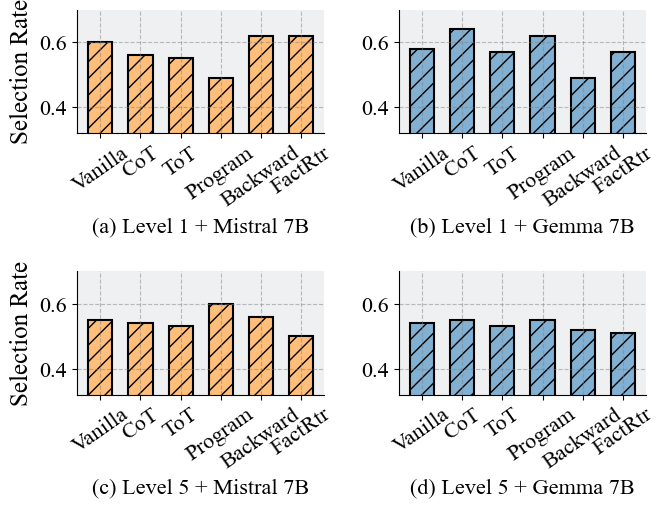

Figure saved to plot/pos_rate_two.pdf


In [40]:

# datasets = [(log_dir1.split('/')[-1], load_counts(log_dir1)),
#             (log_dir2.split('/')[-1], load_counts(log_dir2))]
# datasets = [(name, rates_from_counts(c)) for name,c in datasets]


# ---- style (matches paper) ----
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.facecolor'] = '#EEF0F2'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.alpha'] = 0.5



fig, axs = plt.subplots(2, 2, figsize=(7, 5.5), squeeze=False)
bar_w = 0.6
colors = [(255/255, 190/255, 122/255), (130/255.0, 176/255.0, 210/255.0)]

s1s = [[0.60, 0.56, 0.55, 0.49, 0.62, 0.62],
        [0.55, 0.54, 0.53, 0.60, 0.56, 0.50]]
s2s = [[0.58, 0.64, 0.57, 0.62, 0.49, 0.57],
        [0.54,0.55,0.53,0.55,0.52,0.51]]

for row in range(2):
    cot_ids = ['Vanilla', 'CoT', 'ToT', 'Program', 'Backward', 'FactRtr']
    s1 = s1s[row]
    s2 = s2s[row]
    x = np.arange(len(cot_ids))

    ax1 = axs[row,0]
    ax1.bar(x, s1, width=bar_w, color=colors[0], edgecolor='black', linewidth=1.5, hatch='//')
    # ax1.set_title(f'{name} – student‑1', fontsize=14)
    ax1.set_ylabel('Selection Rate')
    ax1.set_xticks(x)
    ax1.set_xticklabels(cot_ids, rotation=35, fontsize=16)
    # yticks fontsize
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_ylim(0.32,0.70)
    if row == 0:
        ax1.set_xlabel('(a) Level 1 + Mistral 7B', fontsize=16)
    else:
        ax1.set_xlabel('(c) Level 5 + Mistral 7B', fontsize=16)

    ax2 = axs[row,1]
    ax2.bar(x, s2, width=bar_w, color=colors[1], edgecolor='black', linewidth=1.5, hatch='//')
    # ax2.set_title(f'{name} – student‑2', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(cot_ids, rotation=35)
    ax2.set_ylim(0.32,0.70)
    if row == 0:
        ax2.set_xlabel('(b) Level 1 + Gemma 7B', fontsize=16)
    else:
        ax2.set_xlabel('(d) Level 5 + Gemma 7B', fontsize=16)

    for ax in (ax1,ax2):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', labelsize=16)
plt.tight_layout()

# pdf
plt.savefig(out_fig, dpi=600, bbox_inches='tight')
plt.show()
print(f'Figure saved to {out_fig}')

